In [1]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as scs 
import statsmodels.api as sm 
import statsmodels.tsa.api as smt 

plt.rcParams['figure.figsize'] = (11,5)
plt.style.use('seaborn-whitegrid')

In [2]:
data = yf.download('AAPL', interval='1d', period='10y', progress=False)
data['log_return'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
data['std'] = data['log_return'].rolling(21).std()
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,log_return,std
Date,,,,,,,,
2012-03-21,21.526428,21.773214,21.478930,21.517857,18.425188,644042000,-0.005726,0.013718
2012-03-22,21.349285,21.589287,21.268929,21.405001,18.328552,623870800,-0.005259,0.013793
2012-03-23,21.446072,21.492857,21.228571,21.287500,18.227940,430488800,-0.005505,0.014078
2012-03-26,21.421070,21.683929,21.259287,21.677856,18.562187,595742000,0.018171,0.014261
2012-03-27,21.649286,22.010000,21.645000,21.945715,18.791550,607129600,0.012281,0.014304


In [3]:
r_range = np.linspace(data.log_return.min(), data.log_return.max(), num=1000)
mu = data.log_return.mean()
sigma = data.log_return.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

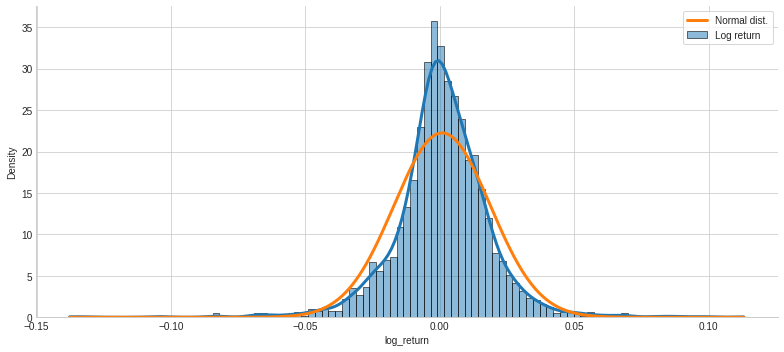

In [4]:
fig, ax = plt.subplots()
sns.histplot(data=data, x='log_return', kde=True, stat='density',ax=ax, 
             label='Log return', fill=True, line_kws={'linewidth':3})
ax.plot(r_range, norm_pdf, color='tab:orange', label="Normal dist.", linewidth=3)
plt.legend(frameon=True)
sns.despine()
plt.tight_layout()
plt.show()

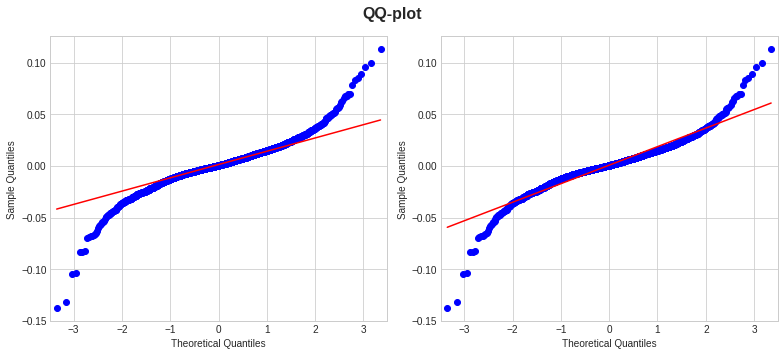

In [5]:
fig, ax = plt.subplots(1,2)

sm.qqplot(data.log_return, line='q', ax=ax[0])
sm.qqplot(data.log_return, line='s', ax=ax[1])
fig.suptitle('QQ-plot', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

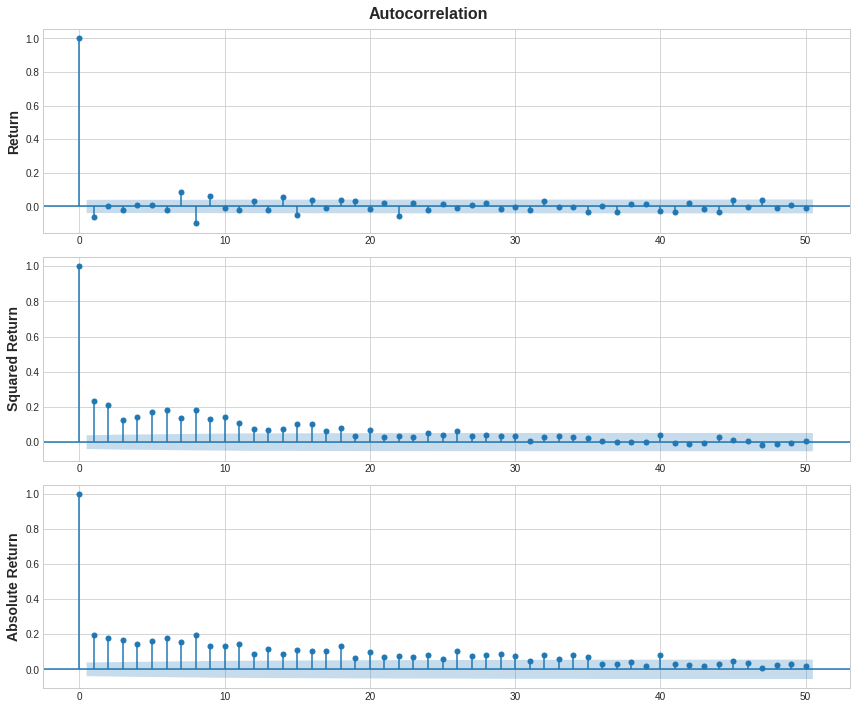

In [6]:
n_lags = 50
alpha = 0.05

fig, ax = plt.subplots(3, 1, figsize=(12, 10))

smt.graphics.plot_acf(data.log_return, lags=n_lags, alpha=alpha, ax=ax[0])
ax[0].set_ylabel('Return', fontsize=14, fontweight='bold')
ax[0].set_title('')

smt.graphics.plot_acf(data.log_return.pow(2), lags=n_lags, alpha=alpha, ax=ax[1])
ax[1].set_ylabel('Squared Return', fontsize=14, fontweight='bold')
ax[1].set_title('')

smt.graphics.plot_acf(np.abs(data.log_return), lags=n_lags, alpha=alpha, ax=ax[2])
ax[2].set_ylabel('Absolute Return', fontsize=14, fontweight='bold')
ax[2].set_title('')

fig.suptitle('Autocorrelation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

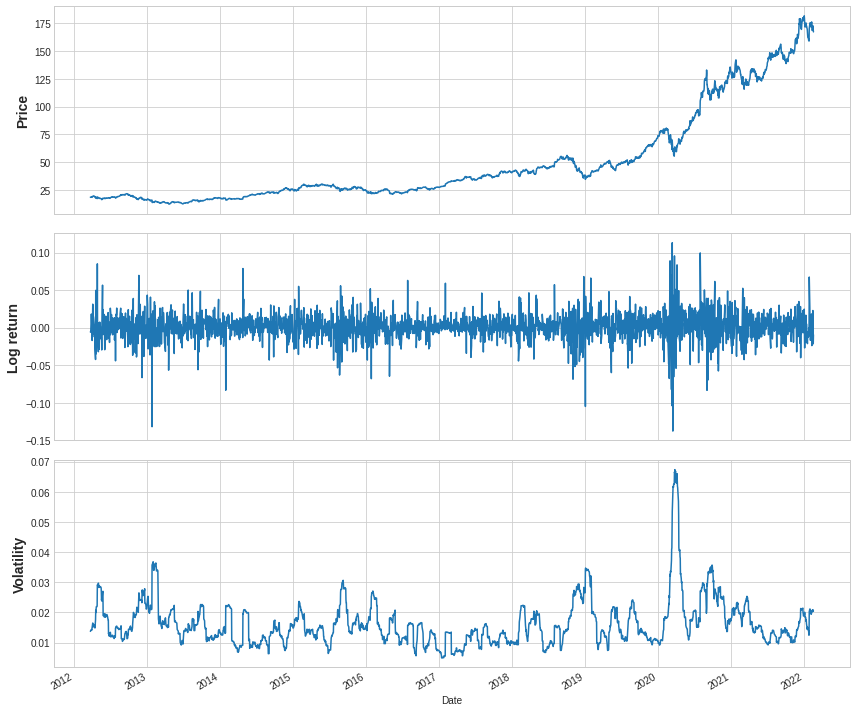

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(12,10), sharex=True)

data['Adj Close'].plot(ax=ax[0])
ax[0].set_ylabel('Price', fontsize=14, fontweight='bold')

data['log_return'].plot(ax=ax[1])
ax[1].set_ylabel('Log return', fontsize=14, fontweight='bold')

data['std'].plot(ax=ax[2])
ax[2].set_ylabel('Volatility', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

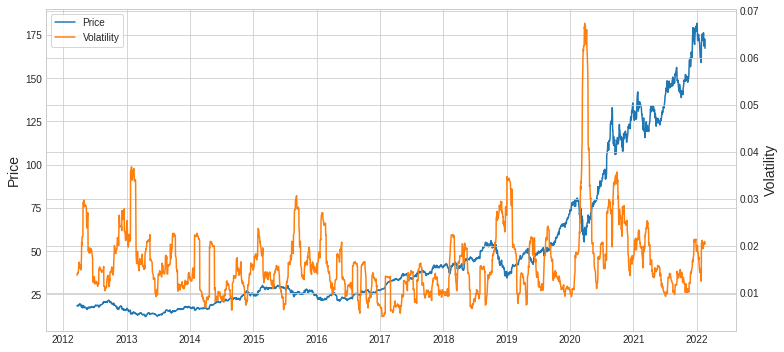

In [8]:
fig, ax = plt.subplots()

line1, = ax.plot(data['Adj Close'], label='Price', color='tab:blue')
ax.set_ylabel('Price', fontsize=14)
ax2 = ax.twinx()
line2, = ax2.plot(data['std'], label='Volatility', color='tab:orange')
ax2.set_ylabel('Volatility', fontsize=14)

plt.legend(handles=[line1, line2], loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

In [9]:
data2 = yf.download(['^GSPC', '^VIX'], interval='1d', period='10y', progress=False)
data2.rename(columns={'^GSPC':'sp500', '^VIX':'vix'}, inplace=True)
data2 = data2['Adj Close']
data2.loc[:,'sp500_ret'] = np.log(data2['sp500']/data2['sp500'].shift(1))
data2.loc[:,'vix_ret'] = np.log(data2['vix']/data2['vix'].shift(1))
data2.head()

,sp500,vix,sp500_ret,vix_ret
Date,,,,
2012-02-21,1362.209961,18.190001,NaN,NaN
2012-02-22,1357.660034,18.190001,-0.003346,0.000000
2012-02-23,1363.459961,16.799999,0.004263,-0.079493
2012-02-24,1365.739990,17.309999,0.001671,0.029905
2012-02-27,1367.589966,18.190001,0.001354,0.049588


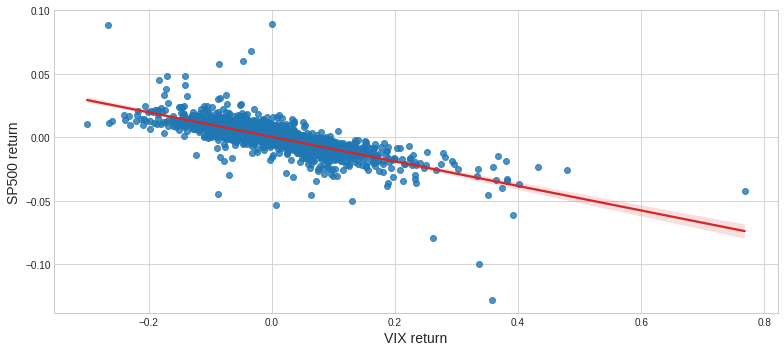

In [10]:
sns.regplot(data=data2, y='sp500_ret', x='vix_ret',
            line_kws={'color':'tab:red'})

plt.xlabel('VIX return', fontsize=14)
plt.ylabel('SP500 return', fontsize=14)
plt.tight_layout()
plt.show()